In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
import scipy.stats as ss

**Useful Functions**

In [2]:
#extract samples for a list of parameters 
def extract_samples (data, plist):
    nD_samples = np.zeros([len(data),len(plist)]);
    for i in range(len(plist)):
        nD_samples[:,i] = data[plist[i]];
    return nD_samples

In [3]:
#Extract model data for intrinsic parameters
def models(filename,key):
    plist = ['mchirp','q','chieff','z']
    model_nD_samples = pd.read_hdf(filename, key=key)
    samples_4D = extract_samples(model_nD_samples,plist)
    return samples_4D

In [5]:
#Extract samples for a parameter for a giiven model
def model_param_samples(filename,key,param):
    data_key = pd.read_hdf(filename, key=key)
    samples_1D = data_key[param]
    return samples_1D
 

In [21]:
#filename = '/Users/sayantanidatta/Documents/conference/ICTS2022/models_reduced.hdf5'
filename = '/Users/sayantanidatta/Documents/conference/ICTS2022/repo/ICTS_GW_2022/forming_merging_binaries/model_downsampled.h5'
f = h5py.File(filename, 'r')
print(f.keys())
print(f['CE']['chi00']['alpha10'].keys())
print(f['CHE']['chi00'].keys())
print(f['GC']['chi00'].keys())
print(f['NSC']['chi00'].keys())
print(f['SMT']['chi00'].keys())

<KeysViewHDF5 ['CE', 'CHE', 'GC', 'NSC', 'SMT']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>
<KeysViewHDF5 ['axis0', 'axis1', 'block0_items', 'block0_values']>


**Chirpmass : chi = 0.0, alpha_CE = 1.0**

In [22]:
#get chirpmass samples for every model with chi = 0.0, alpha_CE = 1.0
chipmass_samples_GC_chi00 = model_param_samples(filename,key='GC/chi00',param='mchirp')
chipmass_samples_NSC_chi00 = model_param_samples(filename,key='NSC/chi00',param='mchirp')
chipmass_samples_SMT_chi00 = model_param_samples(filename,key='SMT/chi00',param='mchirp')
chipmass_samples_CHE_chi00 = model_param_samples(filename,key='CHE/chi00',param='mchirp')
chipmass_samples_CE_chi00 = model_param_samples(filename,key='CE/chi00/alpha10',param='mchirp')
list_model_chirp_samples = [chipmass_samples_GC_chi00,chipmass_samples_NSC_chi00,chipmass_samples_SMT_chi00,
                           chipmass_samples_CHE_chi00,chipmass_samples_CE_chi00]

# Do a kernel density estimate using gaussian_kde with default
#bw=None
'''
kde_chipmass_samples_GC_chi00 =ss.gaussian_kde(chipmass_samples_GC_chi00,bw_method=bw)
kde_chipmass_samples_NSC_chi00=ss.gaussian_kde(chipmass_samples_NSC_chi00,bw_method=bw)
kde_chipmass_samples_SMT_chi00=ss.gaussian_kde(chipmass_samples_SMT_chi00,bw_method=bw)
kde_chipmass_samples_CHE_chi00=ss.gaussian_kde(chipmass_samples_CHE_chi00,bw_method=bw)
kde_chipmass_samples_CE_chi00=ss.gaussian_kde(chipmass_samples_CE_chi00,bw_method=bw)
'''
kde_chipmass_samples_GC_chi00 =ss.gaussian_kde(chipmass_samples_GC_chi00)
kde_chipmass_samples_NSC_chi00=ss.gaussian_kde(chipmass_samples_NSC_chi00)
kde_chipmass_samples_SMT_chi00=ss.gaussian_kde(chipmass_samples_SMT_chi00)
kde_chipmass_samples_CHE_chi00=ss.gaussian_kde(chipmass_samples_CHE_chi00)
kde_chipmass_samples_CE_chi00=ss.gaussian_kde(chipmass_samples_CE_chi00)

In [23]:
# Get minimum and maximum values of chirp mass within which gaussian_kde will be evaluated
chirpmass_min_models=[]
chirpmass_max_models=[]
for i in enumerate(list_model_chirp_samples):
    chirpmass_min_models.append(i[1].min())
    chirpmass_max_models.append(i[1].max())
    
all_models_mchirp_min = np.array(chirpmass_min_models).min()
all_models_mchirp_max = np.array(chirpmass_max_models).max()

#get an array for chirp mass values
dx=0.05
mchirp_x = np.arange(all_models_mchirp_min,all_models_mchirp_max,dx)
len(mchirp_x)


1552

In [12]:
#Get samples by evaluating the gaussian_kde for the above chirp mass values
mchirp_GC_chi00_y = kde_chipmass_samples_GC_chi00(mchirp_x)
mchirp_NSC_chi00_y = kde_chipmass_samples_NSC_chi00(mchirp_x)
mchirp_SMT_chi00_y = kde_chipmass_samples_SMT_chi00(mchirp_x)
mchirp_CHE_chi00_y = kde_chipmass_samples_CHE_chi00(mchirp_x)
mchirp_CE_chi00_y = kde_chipmass_samples_CE_chi00(mchirp_x)

In [13]:
#normalize the samples
mchirp_GC_chi00_y  = mchirp_GC_chi00_y /np.sum(dx * mchirp_GC_chi00_y)
mchirp_NSC_chi00_y  = mchirp_NSC_chi00_y /np.sum(dx * mchirp_NSC_chi00_y)
mchirp_SMT_chi00_y  = mchirp_SMT_chi00_y /np.sum(dx * mchirp_SMT_chi00_y)
mchirp_CHE_chi00_y  = mchirp_CHE_chi00_y /np.sum(dx * mchirp_CHE_chi00_y)
mchirp_CE_chi00_y  = mchirp_CE_chi00_y /np.sum(dx * mchirp_CE_chi00_y)

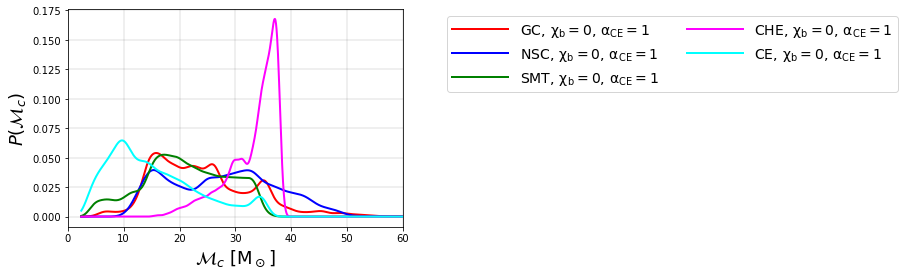

In [14]:
#plot the chirp mass distributions for different models and explain the differences
plt.plot(mchirp_x, mchirp_GC_chi00_y, label=r'$\mathrm{GC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='red')
plt.plot(mchirp_x, mchirp_NSC_chi00_y, label=r'$\mathrm{NSC,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='blue')
plt.plot(mchirp_x, mchirp_SMT_chi00_y, label=r'$\mathrm{SMT,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='green')
plt.plot(mchirp_x, mchirp_CHE_chi00_y, label=r'$\mathrm{CHE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='magenta')
plt.plot(mchirp_x, mchirp_CE_chi00_y, label=r'$\mathrm{CE,\,\chi_b=0,\,\alpha_{CE}=1}$',
         lw=2, color='cyan')
plt.legend(ncol=2, fontsize=14,  handlelength=4, loc='upper right',bbox_to_anchor =(2.5,1) )

plt.xlim(0,60)

plt.xlabel(r'$\mathcal{M}_c\ [\mathrm{M}_\odot]$',fontsize=18)
plt.ylabel(r'$P(\mathcal{M}_c)$',fontsize=18 )

#plt.grid(color='grey', linestyle='dotted', linewidth=1)
plt.grid(b=True, axis='both', alpha=0.6, color='k', linestyle='solid', linewidth=0.2)



**Plot Model data: CE/chi00/**

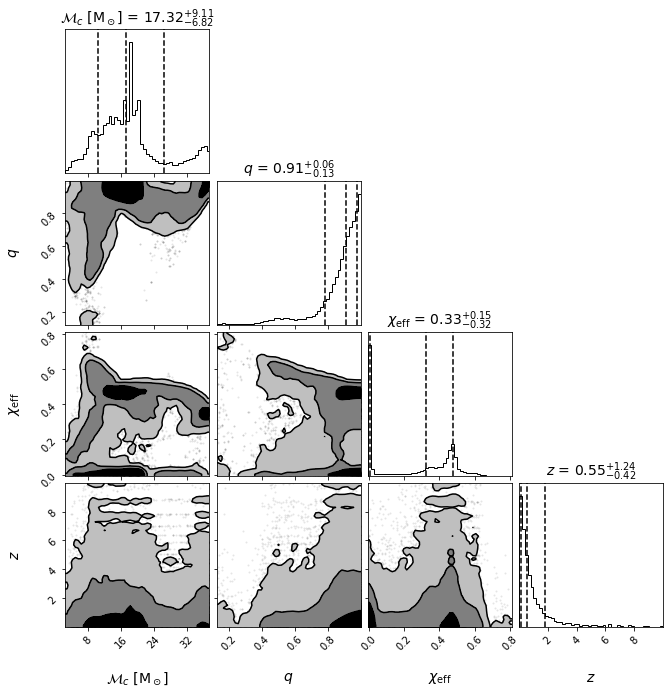

In [32]:
plist_samples = models(filename,key='CE/chi00/alpha02')
corner_kwargs = dict(bins=50, smooth=0.9, label_kwargs=dict(fontsize=14),
            title_kwargs=dict(fontsize=14),show_titles=True, color='k', quantiles=[0.16, 0.5, 0.84],
            levels = (0.5, 0.9, 0.99), fill_contours=True,max_n_ticks=5)

labels_plist = [r'$\mathcal{M}_c\ [\mathrm{M}_\odot]$', r'$q$', r'$\chi_{\rm eff}$', r'$z$']

plot_CE_chi00_alpha02=corner.corner(plist_samples, labels=labels_plist,**corner_kwargs)       